<a href="https://colab.research.google.com/github/nirmit27/ml-notebooks/blob/main/ML/ML_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TnP Sessions** - Machine Learning
> July 2024

### Importing the necessary modules

In [ ]:
!pip install feature_engine
!pip install --upgrade pandas

In [2]:
import os

import numpy as np
import pandas as pd
from scipy import stats

import pylab
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from feature_engine import transformation
from feature_engine.outliers import Winsorizer
from feature_engine.imputation import RandomSampleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

### Importing the datasets

In [3]:
for dirname, _, filenames in os.walk(os.getcwd()):
  if "sample_data" not in dirname:
    for filename in filenames:
      if filename.endswith(".csv"):
        print(os.path.join(dirname, filename))

/content/modified ethnic.csv
/content/cars.csv
/content/mtcars_dup.csv
/content/education.csv
/content/mtcars.csv
/content/ethnic diversity.csv


### **Ethnic Diversity**

In [4]:
ethnic = pd.read_csv(r'/content/ethnic diversity.csv')
ethnic.head()

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674.28,28,Black or African American
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674.28,50,Black or African American
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674.28,43,White
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822.00,44,White
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089.35,33,White


#### Typecasting `int64` to `str` values

In [5]:
ethnic['EmpID'] = ethnic['EmpID'].astype('str')
ethnic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee_Name     310 non-null    object 
 1   EmpID             310 non-null    object 
 2   Position          310 non-null    object 
 3   State             310 non-null    object 
 4   Zip               310 non-null    int64  
 5   Sex               310 non-null    object 
 6   MaritalDesc       310 non-null    object 
 7   CitizenDesc       310 non-null    object 
 8   EmploymentStatus  310 non-null    object 
 9   Department        310 non-null    object 
 10  Salaries          310 non-null    float64
 11  age               310 non-null    int64  
 12  Race              310 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 31.6+ KB


### **Outlier** Treatment

#### Boxplots for `Salaries` and `Age` columns

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


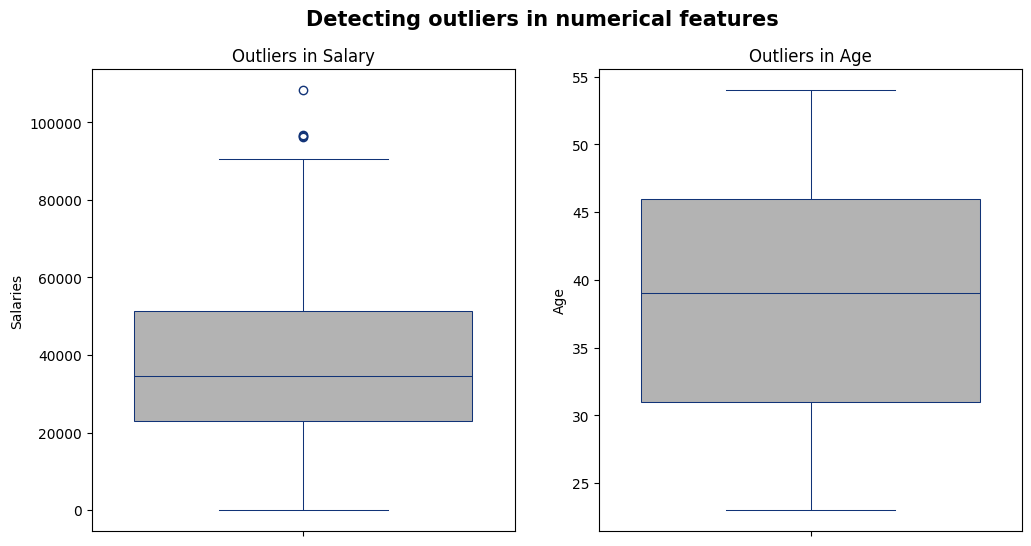

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Detecting outliers in numerical features", fontweight='bold', fontsize=15)

sns.boxplot(y=ethnic['Salaries'], color=".7", linecolor="#137", linewidth=.75, ax=axs[0])
axs[0].set_title("Outliers in Salary")

sns.boxplot(y=ethnic['age'], color=".7", linecolor="#137", linewidth=.75, ax=axs[1])
axs[1].set_title("Outliers in Age")
axs[1].set_ylabel("Age")

plt.show()

> We can observe that there are **no** outliers in `Age` column, but some outliers in `Salaries` column.

#### **Trimming** of outliers
> Using the **Inter-Quartile Range**

In [7]:
iqr = ethnic.Salaries.quantile(0.75) - ethnic.Salaries.quantile(0.25)
lower = ethnic.Salaries.quantile(0.25) - (iqr * 1.5)
upper = ethnic.Salaries.quantile(0.75) + (iqr * 1.5)

outliers_col = np.where(ethnic.Salaries < lower, True, np.where(ethnic.Salaries > upper, True, False))
ethnic_trimmed = ethnic.loc[~outliers_col]

In [8]:
ethnic_trimmed.shape

(306, 13)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


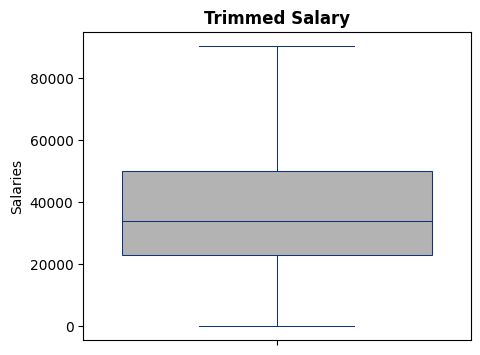

In [86]:
plt.figure(figsize=(5, 4))
plt.title("Trimmed Salary", fontweight='bold')
sns.boxplot(y=ethnic_trimmed['Salaries'], color=".7", linecolor="#137", linewidth=.75)

plt.show()

#### **WINSORIZATION** of outliers
> Using the `Winsorizer` from `feature_engine` module

1.   Using the `iqr` capping method, with a fold value of `1.5`

In [37]:
winsor_iqr = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=['Salaries']
)
salaries_wi = pd.DataFrame(winsor_iqr.fit_transform(ethnic[['Salaries']]))

2.   Using the `gaussian` capping method, with a fold value of `2.5`

In [68]:
winsor_iqr = Winsorizer(
    capping_method='gaussian',
    tail='both',
    fold=2.5,
    variables=['Salaries']
)
salaries_wg = pd.DataFrame(winsor_iqr.fit_transform(ethnic[['Salaries']]))

##### **Results** from Winsorization

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


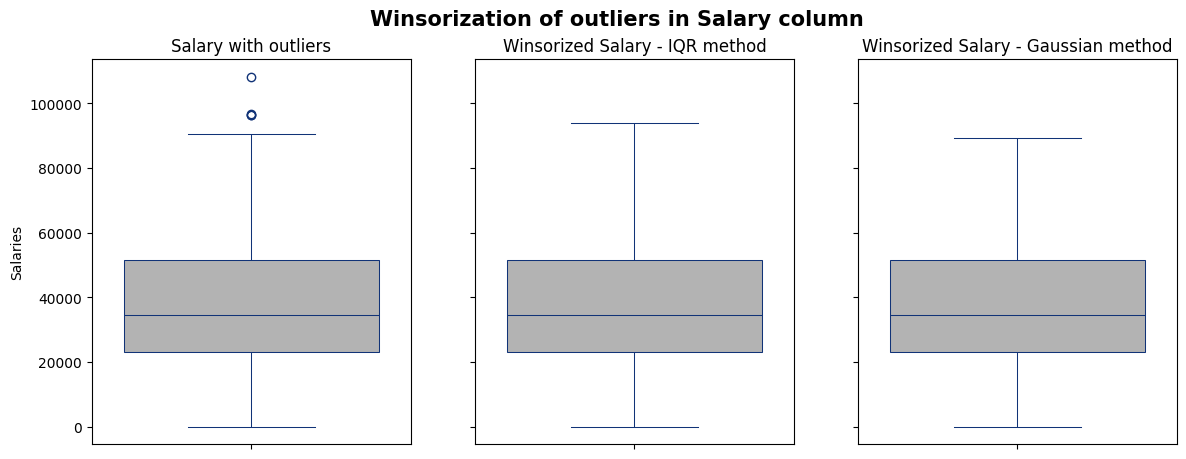

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True)
fig.suptitle("Winsorization of outliers in Salary column", fontweight='bold', fontsize=15)

sns.boxplot(y=ethnic['Salaries'], color=".7", linecolor="#137", linewidth=.75, ax=axs[0])
axs[0].set_title("Salary with outliers")

sns.boxplot(y=salaries_wi.Salaries, color=".7", linecolor="#137", linewidth=.75, ax=axs[1])
axs[1].set_title("Winsorized Salary - IQR method")

sns.boxplot(y=salaries_wg.Salaries, color=".7", linecolor="#137", linewidth=.75, ax=axs[2])
axs[2].set_title("Winsorized Salary - Gaussian method")

plt.show()

### **Discretization**
Converting continuous column values into **discrete** values

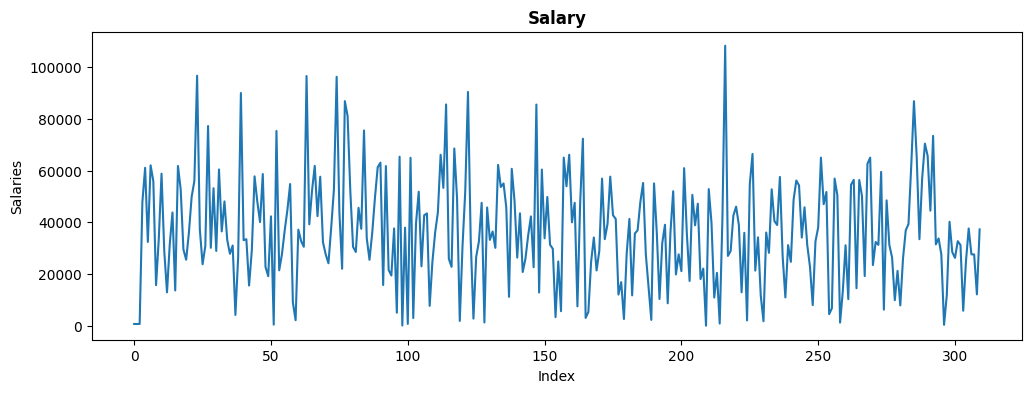

In [94]:
plt.figure(figsize=(12, 4))
plt.title("Salary", fontweight='bold')
plt.ylabel("Salaries")
plt.xlabel("Index")

ethnic.Salaries.plot()

plt.show()

#### Using **2** discrete labels based on **minimum** and **maximum** salary

In [100]:
ethnic['Salaries_binned'] = pd.cut(ethnic.Salaries,
                                   bins=[ethnic.Salaries.min(), ethnic.Salaries.mean(), ethnic.Salaries.max()],
                                   include_lowest=True,
                                   labels=["Low", "High"])

ethnic.Salaries_binned.value_counts()

Salaries_binned
Low     167
High    143
Name: count, dtype: int64

#### Using **4** discrete labels based on **percentile**

In [101]:
ethnic['Salaries_binned'] = pd.cut(ethnic.Salaries,
                                   bins=[ethnic.Salaries.min(), ethnic.Salaries.quantile(0.25), ethnic.Salaries.mean(), ethnic.Salaries.quantile(0.75), ethnic.Salaries.max()],
                                   include_lowest=True,
                                   labels=["P1", "P2", "P3", "P4"])

ethnic.Salaries_binned.value_counts()

Salaries_binned
P2    89
P1    78
P4    78
P3    65
Name: count, dtype: int64

### **MT Cars - Duplicates**

In [9]:
mtcars_dup = pd.read_csv(r'/content/mtcars_dup.csv')
mtcars_dup.shape

(32, 11)

#### Filtering the **rows** on the basis of whether or not keeping or ignoring the first or last occurences

In [10]:
# mtcars_dup.loc[mtcars_dup.duplicated(keep=False)]
# mtcars_dup.loc[mtcars_dup.duplicated(keep='first')]
mtcars_dup.loc[mtcars_dup.duplicated(keep='last')]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
6,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
23,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4


#### Dropping duplicate values and keeping the **first** occurence in ROWS

In [11]:
mtcars_dup.drop_duplicates(keep='first', inplace=True)
mtcars_dup.shape

(29, 11)

In [12]:
mtcars_dup.loc[mtcars_dup['mpg'] == 14.3]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
6,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4


### **Cars**

In [13]:
cars = pd.read_csv(r'/content/cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


#### Finding out the **correlation** between the COLUMNS i.e. to remove duplicate information in columns

In [14]:
cars_corr = cars.corr()
cars_corr

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


#### Plotting the **correlation heatmap** for visualising the correlation

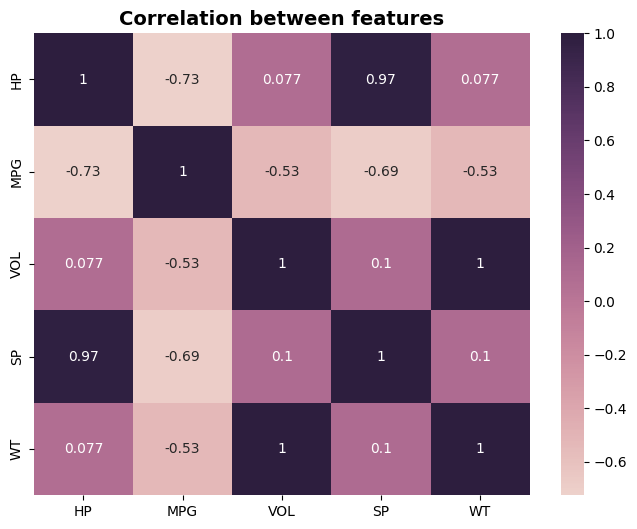

In [54]:
plt.figure(figsize=(8, 6))
plt.title("Correlation between features", fontweight='bold', fontsize=14)
sns.heatmap(cars_corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

plt.show()

> We can observe that the correlation between **HP** - **SP** is `0.97` and that between **VOL** - **WT** is close to `1`. Hence, we can **ignore** one of the columns from both of these pairs as duplicates.

In [16]:
cars.drop(columns=['SP', 'WT'], inplace=True)
cars.shape

(81, 3)